# Assignment 1: Let the Tensors Flow

## Submitted by: Aarathi Vijayachandran Chettiar Bhagavathi

### Assignment question is available here: https://ovgu-ailab.github.io/idl2023/assignment1.html

As reference, I have used the basic MNIST tutorial code already given in assignment https://blog.ai.ovgu.de/posts/jens/2019/002_tf20_basic_mnist/index.html. I extended this tutorial code to create 3 hidden layer MLP.

In [89]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from datasets import MNISTDataset

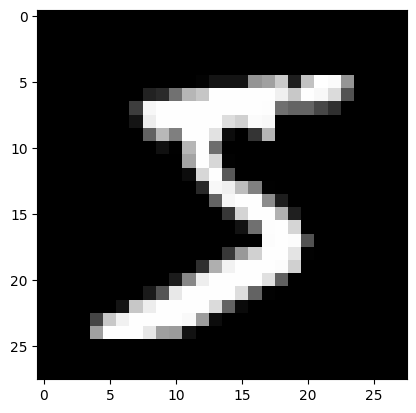

In [90]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

plt.imshow(train_images[0], cmap="Greys_r") # show first image

data = MNISTDataset(train_images.reshape([-1, 784]), train_labels,
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)

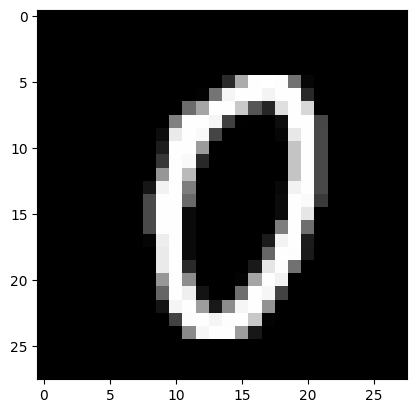

In [91]:
plt.imshow(train_images[1000], cmap="Greys_r") # show 1001th image

# Building A Deep Model

## Part 1: NN model with 1 hidden layer

### No: of hidden layer neurons = 128
### Activation function = ReLU

In [92]:
# Define the number of hidden neurons in the hidden layer
hidden_units = 128

# Initialize the weights and biases for the input to hidden layer
W1 = tf.Variable(tf.random.uniform([784, hidden_units], -0.1, 0.1, dtype=tf.float32))
b1 = tf.Variable(tf.zeros([hidden_units], dtype=tf.float32))

# Initialize the weights and biases for the hidden to output layer
W2 = tf.Variable(tf.random.uniform([hidden_units, 10], -0.1, 0.1, dtype=tf.float32))
b2 = tf.Variable(tf.zeros([10], dtype=tf.float32))

# Define the training parameters
train_steps = 1000
learning_rate = 0.1

for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape() as tape:
        # Forward pass through the hidden layer with ReLU activation
        hidden_layer = tf.nn.relu(tf.matmul(img_batch, W1) + b1)

        # Forward pass through the output layer
        logits = tf.matmul(hidden_layer, W2) + b2

        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=lbl_batch))

    grads = tape.gradient(xent, [W1, b1, W2, b2])
    W1.assign_sub(learning_rate * grads[0])
    b1.assign_sub(learning_rate * grads[1])
    W2.assign_sub(learning_rate * grads[2])
    b2.assign_sub(learning_rate * grads[3])

    if not step % 100:
      preds = tf.argmax(logits, axis=1, output_type=tf.int32)
      acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch), tf.float32))
      print("Loss: {} Accuracy: {}".format(xent, acc))

# Evaluate the model on the test data
test_hidden_layer = tf.nn.relu(tf.matmul(data.test_data, W1) + b1)
test_logits = tf.matmul(test_hidden_layer, W2) + b2
test_preds = tf.argmax(test_logits, axis=1, output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels), tf.float32))
print("\n MODEL EVALUATION: Test Accuracy: {}".format(acc))


Loss: 2.367278575897217 Accuracy: 0.0859375
Loss: 0.5608022212982178 Accuracy: 0.828125
Loss: 0.5076526403427124 Accuracy: 0.8984375
Loss: 0.32462364435195923 Accuracy: 0.9140625
Loss: 0.34278643131256104 Accuracy: 0.8984375
Starting new epoch...
Loss: 0.4591440260410309 Accuracy: 0.890625
Loss: 0.28240734338760376 Accuracy: 0.9140625
Loss: 0.2453421801328659 Accuracy: 0.953125
Loss: 0.1840885877609253 Accuracy: 0.9609375
Loss: 0.27036914229393005 Accuracy: 0.9140625
Starting new epoch...

 MODEL EVALUATION: Test Accuracy: 0.9318000078201294


## Part 2: MLP with 3 hidden layers

### No: of hidden layer neurons for layer 1 = 128
### No: of hidden layer neurons for layer 2 = 64
### No: of hidden layer neurons for layer 3 = 32
### Activation function = ReLU

In [93]:
# Define the number of neurons in each hidden layer
hidden_units1 = 128
hidden_units2 = 64
hidden_units3 = 32

# Initialize the weights and biases for the input to hidden layers
W1 = tf.Variable(tf.random.uniform([784, hidden_units1], -0.1, 0.1, dtype=tf.float32))
b1 = tf.Variable(tf.zeros([hidden_units1], dtype=tf.float32))

W2 = tf.Variable(tf.random.uniform([hidden_units1, hidden_units2], -0.1, 0.1, dtype=tf.float32))
b2 = tf.Variable(tf.zeros([hidden_units2], dtype=tf.float32))

W3 = tf.Variable(tf.random.uniform([hidden_units2, hidden_units3], -0.1, 0.1, dtype=tf.float32))
b3 = tf.Variable(tf.zeros([hidden_units3], dtype=tf.float32))

# Initialize the weights and biases for the hidden to output layer
W4 = tf.Variable(tf.random.uniform([hidden_units3, 10], -0.1, 0.1, dtype=tf.float32))
b4 = tf.Variable(tf.zeros([10], dtype=tf.float32))

# Define the training parameters
train_steps = 1000
learning_rate = 0.1

for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape() as tape:
        # Forward pass through the first hidden layer with ReLU activation
        hidden_layer1 = tf.nn.relu(tf.matmul(img_batch, W1) + b1)

        # Forward pass through the second hidden layer with ReLU activation
        hidden_layer2 = tf.nn.relu(tf.matmul(hidden_layer1, W2) + b2)

        # Forward pass through the third hidden layer with ReLU activation
        hidden_layer3 = tf.nn.relu(tf.matmul(hidden_layer2, W3) + b3)

        # Forward pass through the output layer
        logits = tf.matmul(hidden_layer3, W4) + b4

        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=lbl_batch))

    grads = tape.gradient(xent, [W1, b1, W2, b2, W3, b3, W4, b4])
    W1.assign_sub(learning_rate * grads[0])
    b1.assign_sub(learning_rate * grads[1])
    W2.assign_sub(learning_rate * grads[2])
    b2.assign_sub(learning_rate * grads[3])
    W3.assign_sub(learning_rate * grads[4])
    b3.assign_sub(learning_rate * grads[5])
    W4.assign_sub(learning_rate * grads[6])
    b4.assign_sub(learning_rate * grads[7])

    if not step % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch), tf.float32))
        print("Loss: {} Accuracy: {}".format(xent, acc))

# Evaluate the model on the test data
test_hidden_layer1 = tf.nn.relu(tf.matmul(data.test_data, W1) + b1)
test_hidden_layer2 = tf.nn.relu(tf.matmul(test_hidden_layer1, W2) + b2)
test_hidden_layer3 = tf.nn.relu(tf.matmul(test_hidden_layer2, W3) + b3)
test_logits = tf.matmul(test_hidden_layer3, W4) + b4
test_preds = tf.argmax(test_logits, axis=1, output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels), tf.float32))
print("\n MODEL EVALUATION: Test Accuracy: {}".format(acc))


Loss: 2.304109573364258 Accuracy: 0.09375
Loss: 2.109827995300293 Accuracy: 0.4140625
Loss: 0.8372287750244141 Accuracy: 0.75
Loss: 0.4638826549053192 Accuracy: 0.8671875
Loss: 0.35696905851364136 Accuracy: 0.90625
Starting new epoch...
Loss: 0.33782440423965454 Accuracy: 0.9375
Loss: 0.3168415427207947 Accuracy: 0.8984375
Loss: 0.2850255072116852 Accuracy: 0.921875
Loss: 0.2946668863296509 Accuracy: 0.9296875
Starting new epoch...
Loss: 0.15295152366161346 Accuracy: 0.96875

 MODEL EVALUATION: Test Accuracy: 0.9440000057220459


## Part 3: Experiment with different hidden layer sizes and activation functions

### Different hidden unit configurations = [(128, 64, 32), (64, 32, 16)]  
### Different activation function configurations = [("relu", "tanh", "sigmoid"), ("tanh", "sigmoid", "relu")]  

Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...
Starting new epoch...


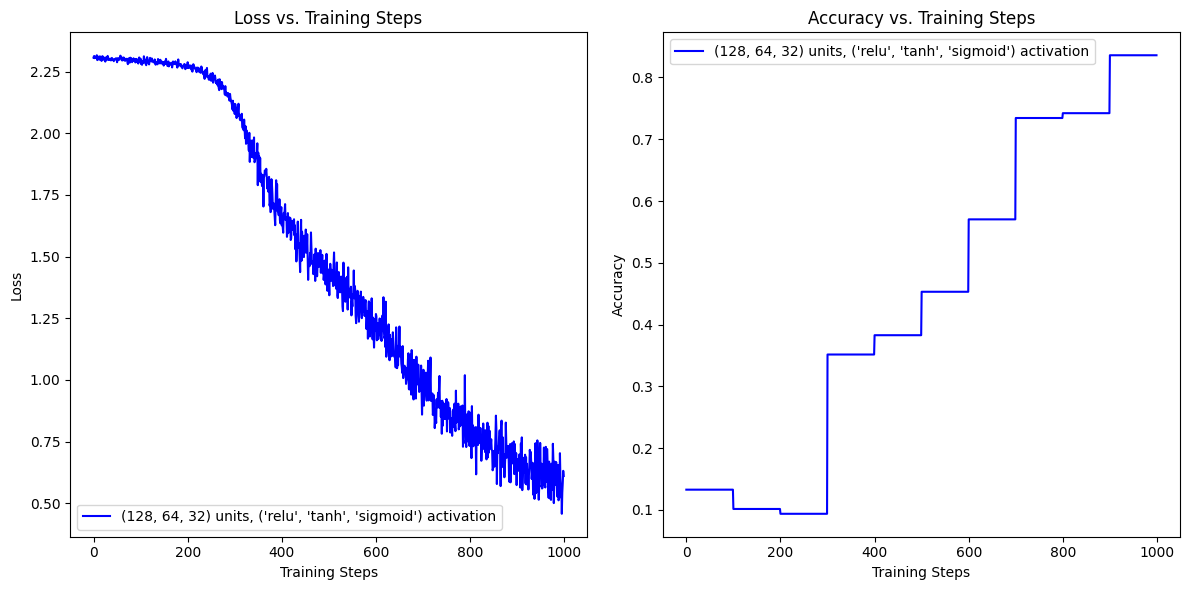

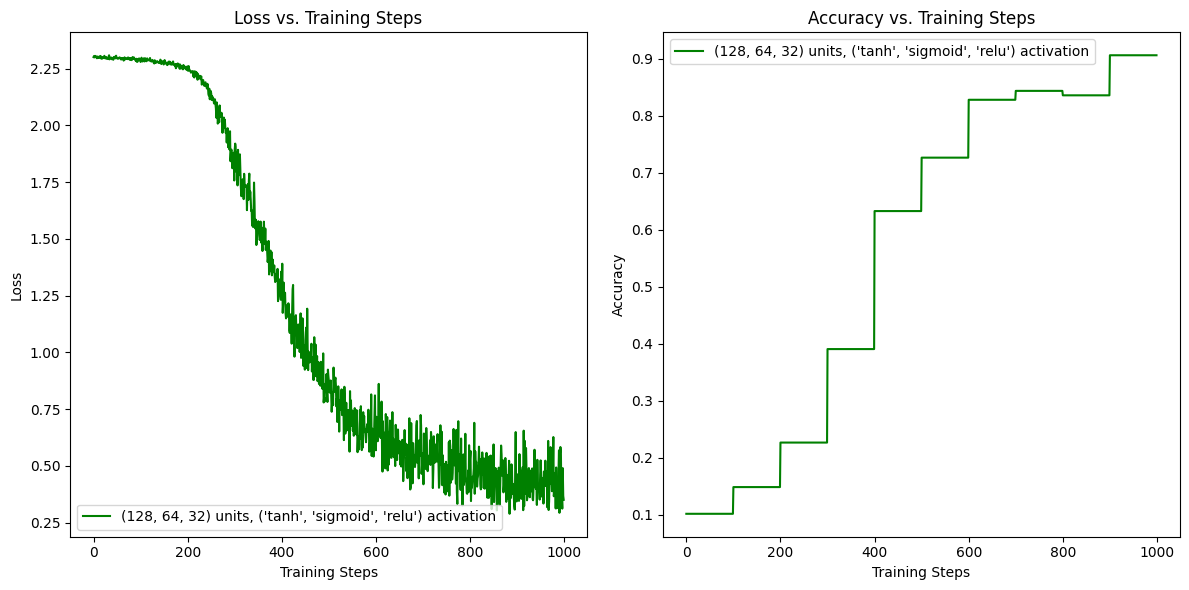

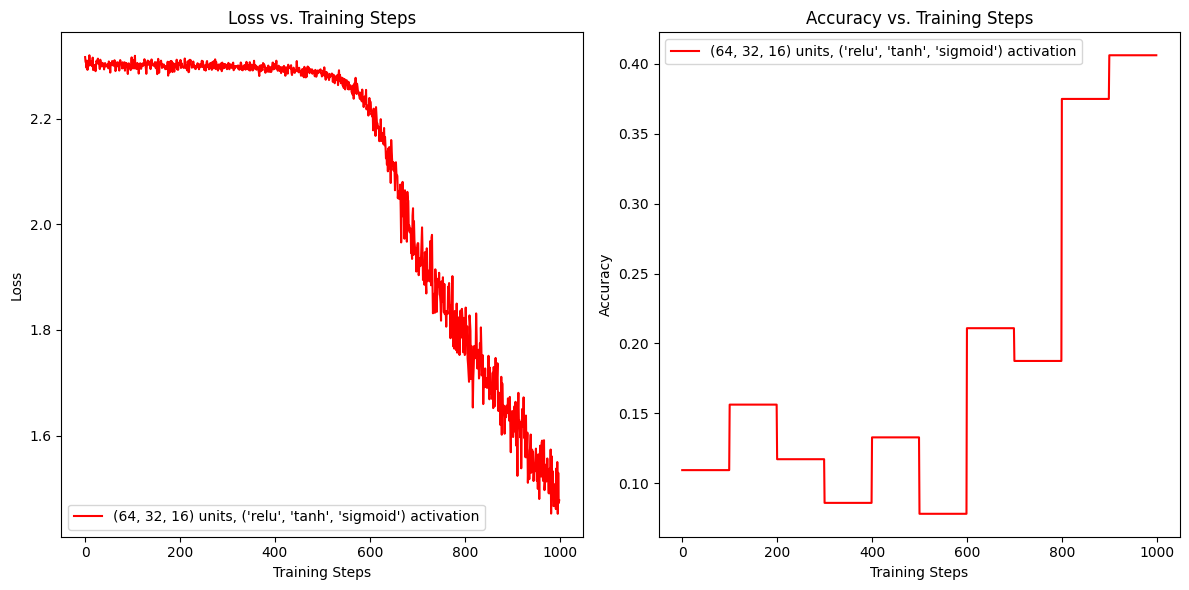

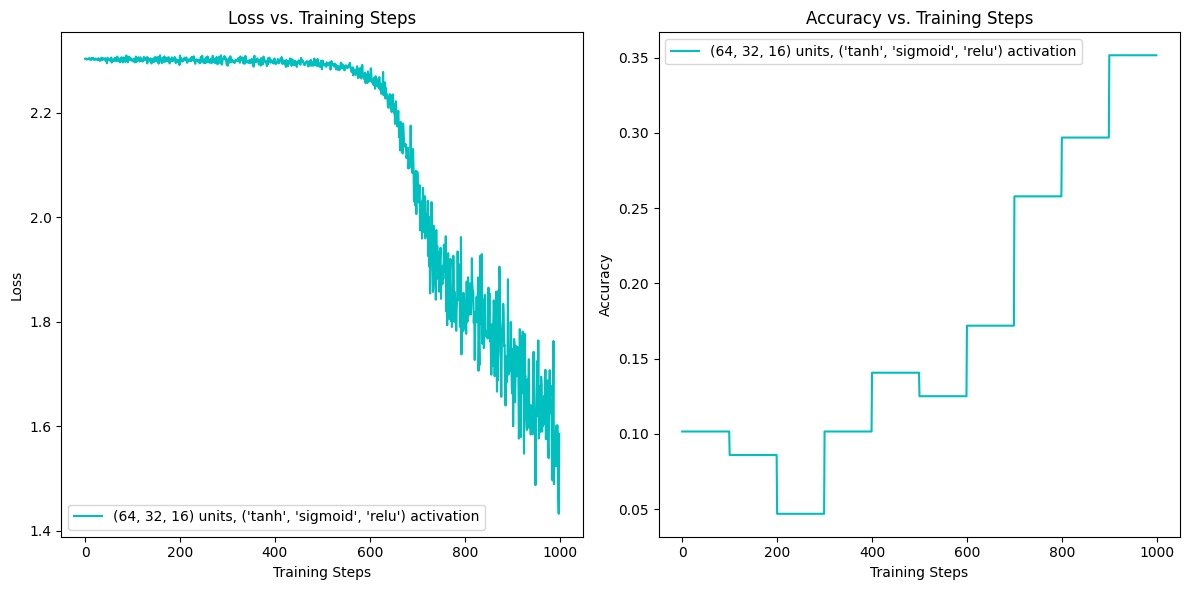

In [94]:
# Define a function to create and train the model
def train_and_evaluate(hidden_units, activation_functions):
    if len(hidden_units) != 3 or len(activation_functions) != 3:
        raise ValueError("You should provide 3 hidden units and 3 activation functions.")

    # Initialize the weights and biases
    weight_initializer = tf.random.uniform([784, hidden_units[0]], -0.1, 0.1, dtype=tf.float32)

    W1 = tf.Variable(weight_initializer)
    b1 = tf.Variable(tf.zeros([hidden_units[0]], dtype=tf.float32))

    weight_initializer = tf.random.uniform([hidden_units[0], hidden_units[1]], -0.1, 0.1, dtype=tf.float32)

    W2 = tf.Variable(weight_initializer)
    b2 = tf.Variable(tf.zeros([hidden_units[1]], dtype=tf.float32))

    weight_initializer = tf.random.uniform([hidden_units[1], hidden_units[2]], -0.1, 0.1, dtype=tf.float32)

    W3 = tf.Variable(weight_initializer)
    b3 = tf.Variable(tf.zeros([hidden_units[2]], dtype=tf.float32))

    weight_initializer = tf.random.uniform([hidden_units[2], 10], -0.1, 0.1, dtype=tf.float32)

    W4 = tf.Variable(weight_initializer)
    b4 = tf.Variable(tf.zeros([10], dtype=tf.float32))

    # Define the training parameters
    train_steps = 1000
    learning_rate = 0.1
    loss_history = []
    accuracy_history = []

    for step in range(train_steps):
        img_batch, lbl_batch = data.next_batch()
        with tf.GradientTape() as tape:
            # Forward pass through the first hidden layer with the first activation function
            if activation_functions[0] == "relu":
                hidden_layer1 = tf.nn.relu(tf.matmul(img_batch, W1) + b1)
            elif activation_functions[0] == "tanh":
                hidden_layer1 = tf.nn.tanh(tf.matmul(img_batch, W1) + b1)
            elif activation_functions[0] == "sigmoid":
                hidden_layer1 = tf.math.sigmoid(tf.matmul(img_batch, W1) + b1)

            # Forward pass through the second hidden layer with the second activation function
            if activation_functions[1] == "relu":
                hidden_layer2 = tf.nn.relu(tf.matmul(hidden_layer1, W2) + b2)
            elif activation_functions[1] == "tanh":
                hidden_layer2 = tf.nn.tanh(tf.matmul(hidden_layer1, W2) + b2)
            elif activation_functions[1] == "sigmoid":
                hidden_layer2 = tf.math.sigmoid(tf.matmul(hidden_layer1, W2) + b2)

            # Forward pass through the third hidden layer with the third activation function
            if activation_functions[2] == "relu":
                hidden_layer3 = tf.nn.relu(tf.matmul(hidden_layer2, W3) + b3)
            elif activation_functions[2] == "tanh":
                hidden_layer3 = tf.nn.tanh(tf.matmul(hidden_layer2, W3) + b3)
            elif activation_functions[2] == "sigmoid":
                hidden_layer3 = tf.math.sigmoid(tf.matmul(hidden_layer2, W3) + b3)

            # Forward pass through the output layer
            logits = tf.matmul(hidden_layer3, W4) + b4

            xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=lbl_batch))

        grads = tape.gradient(xent, [W1, b1, W2, b2, W3, b3, W4, b4])
        W1.assign_sub(learning_rate * grads[0])
        b1.assign_sub(learning_rate * grads[1])
        W2.assign_sub(learning_rate * grads[2])
        b2.assign_sub(learning_rate * grads[3])
        W3.assign_sub(learning_rate * grads[4])
        b3.assign_sub(learning_rate * grads[5])
        W4.assign_sub(learning_rate * grads[6])
        b4.assign_sub(learning_rate * grads[7])

        if not step % 100:
            preds = tf.argmax(logits, axis=1, output_type=tf.int32)
            acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch), tf.float32))
            # print("Loss: {} Accuracy: {}".format(xent, acc))

        # Append the loss and accuracy to their respective histories
        loss_history.append(xent.numpy())
        accuracy_history.append(acc.numpy())

    return loss_history, accuracy_history

# Experiment with different configurations
hidden_units_list = [(128, 64, 32), (64, 32, 16)]  # Different hidden unit configurations
activation_functions_list = [("relu", "tanh", "sigmoid"), ("tanh", "sigmoid", "relu")]  # Different activation function configurations

results = {}  # Dictionary to store results

for hidden_units in hidden_units_list:
    for activation_functions in activation_functions_list:
        key = (hidden_units, activation_functions)
        loss_history, accuracy_history = train_and_evaluate(hidden_units, activation_functions)
        results[key] = (loss_history, accuracy_history)

# Define colors for the plots
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Visualize the results in separate plots for both Loss and Accuracy with different colors
for i, (key, (loss_history, accuracy_history)) in enumerate(results.items()):
    hidden_units, activation_functions = key
    label = f"{hidden_units} units, {activation_functions} activation"

    # Plot Loss with different colors
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(loss_history, label=label, color=colors[i % len(colors)])
    plt.xlabel("Training Steps")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Loss vs. Training Steps")

    # Plot Accuracy with different colors
    plt.subplot(1, 2, 2)
    plt.plot(accuracy_history, label=label, color=colors[i % len(colors)])
    plt.xlabel("Training Steps")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Accuracy vs. Training Steps")

    plt.tight_layout()

plt.show()


## Observations

### Best combination of hidden layer sizes and activation functions --> Maximum reduction in loss and best accuracy value
### Hidden layer 1 : size = 128 ; activation function = tanh
### Hidden layer 2 : size = 64 ; activation function = sigmoid
### Hidden layer 3 : size = 32 ; activation function = relu

### Worst combination of hidden layer sizes and activation functions --> Minimum reduction in loss and least accuracy value
### Hidden layer 1 : size = 64 ; activation function = tanh
### Hidden layer 2 : size = 32 ; activation function = sigmoid
### Hidden layer 3 : size = 16 ; activation function = relu